## EDA and initial insights

We will start by importing useful libraries for our project.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset
Here, we will import the dataset, using the pandas *read_csv* function and we will see its first 5 rows.

In [2]:
dataset = pd.read_csv("flight_dataset.csv",sep=',')
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


We can easily notice that the Unnamed column is useless. Let's drop it.

In [3]:
dataset.drop("Unnamed: 0",axis='columns',inplace=True)
dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Check for missing values

In [4]:
dataset.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Check for duplicated values

In [5]:
dataset.duplicated().sum()

0

Our dataset does not contain neither missing nor duplicated values. We can move forward with our work.

### Display categorical unique values
Here, we will show the possible categories of each categorical variable using the *unique* function

In [6]:
display(dataset.airline.unique())
display(dataset.source_city.unique())
display(dataset.destination_city.unique())
display(dataset.departure_time.unique())
display(dataset.arrival_time.unique())
dataset['class'].unique()
display(dataset.stops.unique())

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

array(['zero', 'one', 'two_or_more'], dtype=object)

We can notice that the categorical variable *stops*, which represents the number of stops, has 3 possible values: “zero”, “one”, “two or more”.We can replace those value with their numerical value treating this category as a numerical variable. Encoding “two and more” as 2 shouldn’t be a problem if having more than two stops is rare. Otherwise, there is the risk to limit the capability of our model to predict correctly. We will check this in the continuation of this project.
The same thing could be obtained using the Ordinal Encoder, however we decided to use the pandas *replace* function since we are not introducing a hierarchy, but we are simply replacing a string with its integer value.
Moreover, we can see from the source and destination cities that this flights are only among Indian cities.

In [4]:
dataset.replace({'zero':0,'one':1,'two_or_more':2},inplace=True)
dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


### Dataset description

In [8]:
dataset.describe()

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,12.221021,26.004751,20889.660523
std,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.830000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


From the description, we can see that our numerical ranges are very different and that the price standard deviation is very big. Moreover, the max value of price and duration are much higher than the 75% percentile. This means that we will have some outliers in our dataset. We can confirm our intuitions by seeing at the histograms.

### Histograms
The histogram firstly show that the number of stops is rarely equal to the category "two or more". For this reason, we can assume that introducing a cap for our new numerical variable will not introduce a significant bias to our dataset, as previously imagined. Morover, it is very rare that a flight will have more than two stops. The duration and price variable are skewed. In particular, for the price variable, which we would like to predict, we have the big majority of prices with "lower" values, with some outliers.

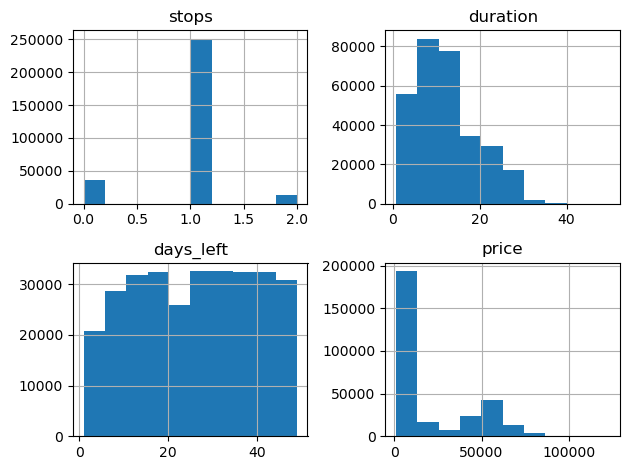

In [9]:
dataset.hist()
plt.tight_layout()
plt.show()

### Correlation matrix

We will now analyse the correlaton matrix in order to find useful insights about our dataset.

C:\Users\micha\AppData\Local\Temp\ipykernel_16440\3596708150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


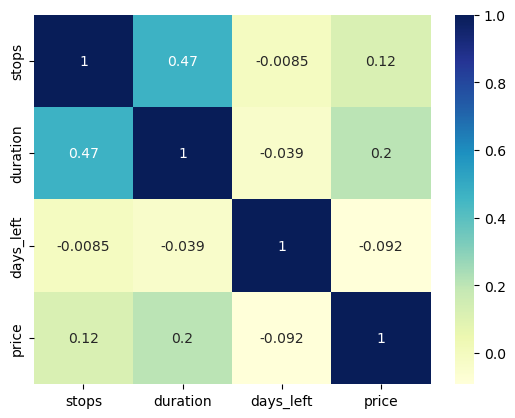

In [10]:
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu', annot=True)
plt.show()

From the correlation matrix, we can notice that:
- The correlation coefficient of 0.2 indicates a positive but moderate correlation between "duration" and "price". This suggests that flights with longer durations tend to have slightly higher prices than those with shorter durations. This could be due to the higher costs associated with longer flights.
- Similar considerations can be done for the correlation between “stops” and “price”. This is due to the fact that “stops” and “duration” are highly correlated (coefficient of 0.47), suggesting that flights with longer durations tend to have higher number of stops (which, again, makes sense).

### Pairplot for evaluating the class category

Among our categorical variables, one that could be interesting is *class*. We imagine that the business class is associated with higher costs with respect to the business class. We can check from the pairplot if our intuition is correct.

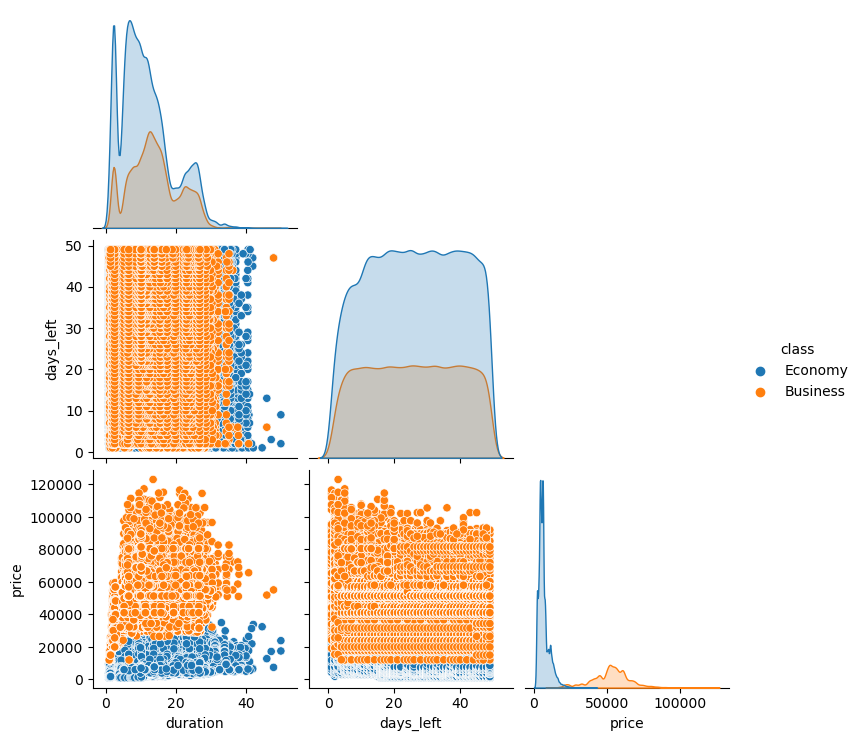

In [12]:
attributes = ["duration","days_left","price","class"]
sns.pairplot(dataset[attributes],corner=True,hue='class')

As we expected, the Business class is associated with a higher price with respect to the Economy class. This can be observed by the plots of the last line.

## Data transformation and definition of our baseline model
Here, we will create our first model for predicting flight's prices. Since the flight number is not useful for the prediction, we will drop it.

In [5]:
dataset.drop("flight",axis='columns',inplace=True)
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


### Stratified sampling for test set
We will first see again the histogram of the duration variable, which,as previously seen, is the variable with highest correlation with our variable that has to be predicted.

<AxesSubplot: >

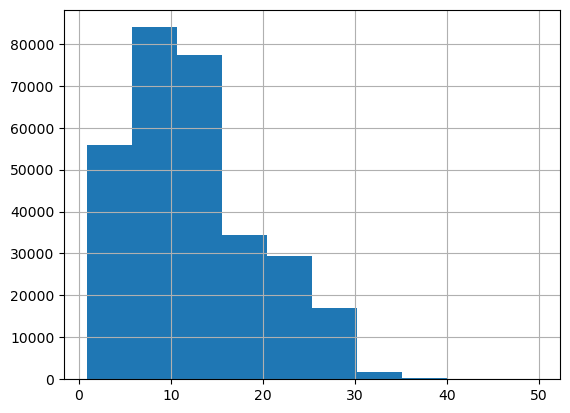

In [14]:
dataset["duration"].hist()

We will now do stratified sampling to ensure that our test set will be representative of the whole dataset. See the *README* file for further explaination of this choice.
Below you will also find the histogram of the new categorical variable created, *dataset_duration_cat*.

<AxesSubplot: >

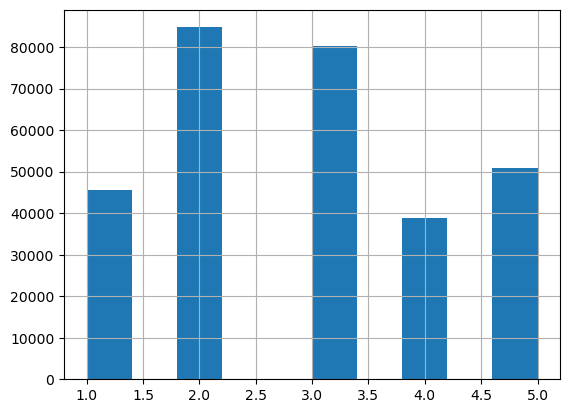

In [6]:
dataset_duration_cat = pd.cut(dataset["duration"],bins=[0,5,10,15,20,np.inf],labels=[1,2,3,4,5])
dataset_duration_cat.hist()

In [7]:
dataset["duration_cat"]=pd.cut(dataset["duration"],bins=[0,5,10,15,20,np.inf],labels=[1,2,3,4,5])

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset_duration_cat):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

We will now check if we achieved what we wanted, by comparing the duration proportions in each of the five categories created with the duration proportions in the whole dataset. We would expect to have very similar proportions.

In [9]:
display(strat_test_set["duration_cat"].value_counts() / len(strat_test_set))
display(dataset["duration_cat"].value_counts()/len(dataset))

2    0.282387
3    0.267262
5    0.169096
1    0.151638
4    0.129616
Name: duration_cat, dtype: float64

2    0.282393
3    0.267264
5    0.169097
1    0.151633
4    0.129614
Name: duration_cat, dtype: float64

This means that our test set is representative of the dataset with regards to the duration variable. We will now drop the new column created.

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("duration_cat", axis=1, inplace=True)

### Transform data to prepare it for modelling

In [10]:
# importing libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Now, we will create X and y sets for both training and test sets.

In [11]:
label_to_predict = 'price'
X_strat_train_set = strat_train_set.drop(label_to_predict, axis=1)
y_strat_train_set = strat_train_set[label_to_predict]
X_strat_test_set = strat_test_set.drop(label_to_predict, axis=1)
y_strat_test_set = strat_test_set[label_to_predict]

Now, we will divide the categorical and numerical values in order to use the Standard Scaler for the numerical variables and the OneHotEncoder for the categorical numbers. This will be done using a Pipeline.

In [12]:
X_strat_train_set_num = X_strat_train_set.drop(["airline","source_city","departure_time",
                                                "arrival_time","destination_city","class"], axis=1)
num_attribs = list(X_strat_train_set_num)
cat_attribs = ["airline","source_city","departure_time","arrival_time","destination_city",
               "class"]
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),      # Apply the numerical pipeline to the numerical features
    ("cat", OneHotEncoder(dtype=int,sparse=False), cat_attribs),   # Apply one-hot encoding to the categorical feature(s)
])

We will use the *fit_transform method* for the train set and the transform method for the test set, to avoid data leakage. We will also stre the y_test value, which will be used to evaluate our model's performances.

In [13]:
X_train = full_pipeline.fit_transform(X_strat_train_set)
X_test = full_pipeline.transform(X_strat_test_set)
y_train = y_strat_train_set.values
y_test = y_strat_test_set.values #this value will be compared to our prediction

C:\Users\micha\anaconda3\envs\datavis\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Baseline model
We will start by predicting the price value with Linear Regression, which is a very simple method and very easy to interpretate.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Set up a regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Compute the mean absolute error and R-squared on the test set
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean absolute error: 4500.09543714914
R-squared: 0.9108583882597157


We will now look at the coefficients, which can be useful for an interpretation of our results.

In [16]:
lin_reg.coef_

array([ 2.25404648e+03,  6.09315474e+02, -1.74223719e+03,  1.79940857e+14,
        1.79940857e+14,  1.79940857e+14,  1.79940857e+14,  1.79940857e+14,
        1.79940857e+14,  4.82667409e+12,  4.82667409e+12,  4.82667409e+12,
        4.82667409e+12,  4.82667409e+12,  4.82667409e+12, -8.03421260e+12,
       -8.03421260e+12, -8.03421260e+12, -8.03421260e+12, -8.03421260e+12,
       -8.03421260e+12,  4.89293303e+12,  4.89293303e+12,  4.89293303e+12,
        4.89293303e+12,  4.89293303e+12,  4.89293303e+12,  1.11523617e+13,
        1.11523617e+13,  1.11523617e+13,  1.11523617e+13,  1.11523617e+13,
        1.11523617e+13,  1.66871735e+12,  1.66871730e+12])

Those are the results we have obtained with the Linear Regression model, which is one of the simpliest. Therefore, we will train three regression models which will be considered good only if their performance will be better than our baseline.
We will show three very different models: a more complex but quite understandable one (Decision Tree Regressor), an Ensemble method (Random Forest Regressor) and finally a neural network.

## Decision Tree Regressor
We will now use a more complex method for our prediction, a Decision Tree Regressor, trying to improve the baseline's results.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Set up a regression model
tree_reg = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Compute the mean absolute error and R-squared on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
#print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

Mean absolute error: 1165.9275596497366
R-squared: 0.9761252164526096


We can see that our new model improves the performances with respect to the baseline model, with a MAE significantly reduced

We will now look at the feature importance, which can be useful to understand the most important features for our model

In [19]:
tree_reg.feature_importances_

array([1.83963262e-03, 5.75879821e-02, 1.85420913e-02, 4.32804922e-04,
       9.22664651e-03, 5.21733274e-05, 2.81650835e-04, 5.09894441e-05,
       7.71732843e-04, 1.02431697e-03, 9.07778659e-04, 4.05442099e-03,
       1.23670481e-03, 1.59498380e-03, 2.38320024e-03, 7.12608040e-04,
       7.82691484e-04, 1.16500807e-03, 5.32648910e-05, 7.58827848e-04,
       7.86640562e-04, 9.84275522e-04, 5.69328367e-04, 1.52626220e-03,
       9.83704458e-05, 6.03838670e-04, 1.24663468e-03, 1.04528745e-03,
       8.23489815e-04, 3.62273250e-03, 1.83013399e-03, 1.51014657e-03,
       2.04164975e-03, 0.00000000e+00, 8.79851700e-01])

### Ensemble

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Set up a regression model
for_reg = RandomForestRegressor()

# Fit the model on the training data
for_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = for_reg.predict(X_test)

# Compute the mean absolute error and R-squared on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
#print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

Mean absolute error: 1075.1283471877432
R-squared: 0.9851036685555552


As expected, the ensemble method perform better than the Decision Tree Regressor. We will now look at the feature importance, which can be useful to understand the most important features for our model

In [21]:
for_reg.feature_importances_

array([1.84586013e-03, 5.76307072e-02, 1.86327018e-02, 4.76598085e-04,
       4.90708380e-03, 1.00555920e-04, 3.20892014e-04, 6.28898959e-05,
       4.97342675e-03, 1.14384972e-03, 9.79512991e-04, 3.76608761e-03,
       1.29524537e-03, 1.72075913e-03, 2.17494356e-03, 8.20979084e-04,
       7.78200455e-04, 1.09179299e-03, 5.30909414e-05, 8.80618114e-04,
       7.97882869e-04, 1.03170490e-03, 6.63450253e-04, 1.59635690e-03,
       1.35655386e-04, 6.85671246e-04, 1.14919712e-03, 1.27333138e-03,
       8.85927238e-04, 3.29135671e-03, 1.51947116e-03, 1.84601607e-03,
       1.81950068e-03, 4.66241186e-01, 4.13407497e-01])

## Neural network

In [34]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Set up a regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),#X_train.shape[1] gives the number of features in X_train.
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Flatten the predictions array
y_pred = y_pred.flatten() #convert the 2D array into a 1D array 

# Compute the mean absolute error and R-squared on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
#print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)


# Mean absolute error: 2380.4367766330984
# R-squared: 0.9677006304121702

ModuleNotFoundError: No module named 'tensorflow'

The performances of the neural network are lower than the Random Forest. This is because maybe this model is too complex for our problem.

## Hyperparameters tuning
The last step for our project is to tune the hyperparameters of our best performing model, which is the Random Forest Regressor. Since the performance of our model are already quite good, we will just tune the hyperparameter related to the number of estimators. In order to perform our task, we will use the Grid Search. 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define a range of values for the hyperparameters
param_grid = {
    'n_estimators': [ 100, 150] #50 already tried
}

for_reg = RandomForestRegressor()

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(for_reg, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to fit the model on the training data
best_for_reg = RandomForestRegressor(**grid_search.best_params_)
best_for_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = best_for_reg.predict(X_test)

# Compute the mean absolute error and R-squared on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
#print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

Best hyperparameters: {'n_estimators': 150}
Mean absolute error: 1073.6917299395313
R-squared: 0.9851420045152853


We can see that this model improves the already good performances of the previous Random Forest Regressor. We will see the feature importance of the new model.

In [29]:
feature_importances = best_for_reg.feature_importances_
feature_importances

array([1.84428398e-03, 5.76767670e-02, 1.86216891e-02, 4.78885002e-04,
       5.00549182e-03, 9.84918468e-05, 3.21145695e-04, 6.38371166e-05,
       4.89497951e-03, 1.11495354e-03, 9.99761067e-04, 3.75219684e-03,
       1.28359138e-03, 1.76740917e-03, 2.19232511e-03, 8.40186843e-04,
       7.89676927e-04, 1.10582697e-03, 5.28611260e-05, 8.99246465e-04,
       8.04970688e-04, 1.02132170e-03, 6.67115738e-04, 1.56025041e-03,
       1.36620996e-04, 6.68214632e-04, 1.14318209e-03, 1.21950116e-03,
       8.72521028e-04, 3.28780693e-03, 1.56326319e-03, 1.80768662e-03,
       1.88256879e-03, 3.87041617e-01, 4.92519753e-01])

## Analyse the best model
We can gain gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions. Those are contained in the variable *feature_importances* saved above. We will display these importance scores next to their corresponding attribute names. Some of these names are modified to discriminate between arrival and departure time and between source and destination city.

In [38]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs_0 = list(cat_encoder.categories_[0])
cat_one_hot_attribs_1 = list(cat_encoder.categories_[1]+'_source')
cat_one_hot_attribs_2 = list(cat_encoder.categories_[2]+'_departure')
cat_one_hot_attribs_3 = list(cat_encoder.categories_[3]+'_arrival')
cat_one_hot_attribs_4 = list(cat_encoder.categories_[4]+'_destination')
cat_one_hot_attribs_5 = list(cat_encoder.categories_[5])
cat_one_hot_attribs = cat_one_hot_attribs_0 + cat_one_hot_attribs_1 + cat_one_hot_attribs_2 + cat_one_hot_attribs_3
cat_one_hot_attribs += cat_one_hot_attribs_4 + cat_one_hot_attribs_5
attributes = num_attribs + cat_one_hot_attribs
attributes

['stops',
 'duration',
 'days_left',
 'AirAsia',
 'Air_India',
 'GO_FIRST',
 'Indigo',
 'SpiceJet',
 'Vistara',
 'Bangalore_source',
 'Chennai_source',
 'Delhi_source',
 'Hyderabad_source',
 'Kolkata_source',
 'Mumbai_source',
 'Afternoon_departure',
 'Early_Morning_departure',
 'Evening_departure',
 'Late_Night_departure',
 'Morning_departure',
 'Night_departure',
 'Afternoon_arrival',
 'Early_Morning_arrival',
 'Evening_arrival',
 'Late_Night_arrival',
 'Morning_arrival',
 'Night_arrival',
 'Bangalore_destination',
 'Chennai_destination',
 'Delhi_destination',
 'Hyderabad_destination',
 'Kolkata_destination',
 'Mumbai_destination',
 'Business',
 'Economy']

Below you can find the feature importances attributes sorted from the most to the lowest important.

In [39]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4925197529178381, 'Economy'),
 (0.38704161659134273, 'Business'),
 (0.057676767019866834, 'duration'),
 (0.018621689080846417, 'days_left'),
 (0.005005491819104098, 'Air_India'),
 (0.004894979505421557, 'Vistara'),
 (0.0037521968407868782, 'Delhi_source'),
 (0.0032878069302157346, 'Delhi_destination'),
 (0.0021923251137093984, 'Mumbai_source'),
 (0.0018825687868431185, 'Mumbai_destination'),
 (0.001844283977371004, 'stops'),
 (0.0018076866245837853, 'Kolkata_destination'),
 (0.0017674091729149995, 'Kolkata_source'),
 (0.0015632631919329774, 'Hyderabad_destination'),
 (0.0015602504056847434, 'Evening_arrival'),
 (0.0012835913846431393, 'Hyderabad_source'),
 (0.0012195011581835726, 'Bangalore_destination'),
 (0.0011431820928294218, 'Night_arrival'),
 (0.0011149535376324066, 'Bangalore_source'),
 (0.001105826974510424, 'Evening_departure'),
 (0.0010213217036284783, 'Afternoon_arrival'),
 (0.000999761066997927, 'Chennai_source'),
 (0.0008992464647639905, 'Morning_departure'),
 (0.00087